!pip install missingno
!pip install wordcloud

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [69]:
youtube = pd.read_csv("C:\\Users\\nguye\\OneDrive - iPrice Group\\Documents\\Project Dataset\\1B YouTube.csv",encoding='ISO-8859-1')

In [70]:
youtube.head()

,Column1,thumbnailUrl,published_date,published_hour,channel_name,channel_id,video_id,video_url,video_tags,cat_id,defaultAudioLanguage,views,likes,comments,Minutes,video_duration,featuring,artist,tittle
0,0,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,2020-08-21,3:58,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,gdZLi9oWNZg,https://www.youtube.com/watch?v=gdZLi9oWNZg,"BIGHIT,???,?????,BTS,BANGTAN,??",10,en,1521861575,34506115,16039232,3.73,224,NaN,BTS,Dynamite
1,1,https://i.ytimg.com/vi/CZt-rVn2BJs/default.jpg,2020-10-02,5:30,Desi Records,UC36Ah1MtcBPjwP1RXEDXOZA,CZt-rVn2BJs,https://www.youtube.com/watch?v=CZt-rVn2BJs,"52 gaj ka daman,52 Gaj Pranjal Dahiya,Pranjal ...",10,hi,1423488438,6991068,145845,3.18,191,NaN,"PRANJAL DAHIYA,AMAN JAJI,RENUKA PANWAR,MUKESH ...",52 GAJ KA DAMAN
2,2,https://i.ytimg.com/vi/VuNIsY6JdUw/default.jpg,2009-06-16,22:02,TaylorSwiftVEVO,UCANLZYMidaCbLQFWXBC95Jg,VuNIsY6JdUw,https://www.youtube.com/watch?v=VuNIsY6JdUw,"Taylor,Swift,Big,Machine,Records,LLC,Country",10,en-US,1331652258,8576951,417058,3.82,229,NaN,Taylor Swift,You Belong With Me
3,3,https://i.ytimg.com/vi/msSc7Mv0QHY/default.jpg,2013-11-06,16:52,J. Geco,UCpIMOJmLiDq8ikUzrjezMIA,msSc7Mv0QHY,https://www.youtube.com/watch?v=msSc7Mv0QHY,"Chicken,song,dance,remix,dubstep,techno,house,...",10,it,1304781302,6937450,209575,2.52,151,NaN,J.Geco,Chicken Song
4,4,https://i.ytimg.com/vi/dQw4w9WgXcQ/default.jpg,2009-10-25,6:57,Rick Astley,UCuAXFkgsw1L7xaCfnd5JJOw,dQw4w9WgXcQ,https://www.youtube.com/watch?v=dQw4w9WgXcQ,"rick astley,Never Gonna Give You Up,nggyu,neve...",10,en,1249126991,14796530,2187460,3.55,213,NaN,Rick Astley,Never Gonna Give You Up


In [36]:
youtube.columns

Index(['Column1', 'thumbnailUrl', 'published_date', 'published_hour',
       'channel_name', 'channel_id', 'video_id', 'video_url', 'video_tags',
       'cat_id', 'defaultAudioLanguage', 'views', 'likes', 'comments',
       'Minutes', 'video_duration', 'featuring', 'artist', 'tittle'],
      dtype='object')

In [37]:
# Drop unnamed column

youtube.drop(['Column1','thumbnailUrl','channel_id',
       'video_id', 'video_url'], axis=1)

,published_date,published_hour,channel_name,video_tags,cat_id,defaultAudioLanguage,views,likes,comments,Minutes,video_duration,featuring,artist,tittle
0,2020-08-21,3:58,HYBE LABELS,"BIGHIT,???,?????,BTS,BANGTAN,??",10,en,1521861575,34506115,16039232,3.73,224,NaN,BTS,Dynamite
1,2020-10-02,5:30,Desi Records,"52 gaj ka daman,52 Gaj Pranjal Dahiya,Pranjal ...",10,hi,1423488438,6991068,145845,3.18,191,NaN,"PRANJAL DAHIYA,AMAN JAJI,RENUKA PANWAR,MUKESH ...",52 GAJ KA DAMAN
2,2009-06-16,22:02,TaylorSwiftVEVO,"Taylor,Swift,Big,Machine,Records,LLC,Country",10,en-US,1331652258,8576951,417058,3.82,229,NaN,Taylor Swift,You Belong With Me
3,2013-11-06,16:52,J. Geco,"Chicken,song,dance,remix,dubstep,techno,house,...",10,it,1304781302,6937450,209575,2.52,151,NaN,J.Geco,Chicken Song
4,2009-10-25,6:57,Rick Astley,"rick astley,Never Gonna Give You Up,nggyu,neve...",10,en,1249126991,14796530,2187460,3.55,213,NaN,Rick Astley,Never Gonna Give You Up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2017-07-28,7:00,CarlosVivesVEVO,"Carlos Vives & Sebastian Yatra Music,Carlos Vi...",10,en-US,1535378177,4501043,114551,3.30,198,NaN,"Carlos Vives, Sebastián Yatra",Robarte un Beso
290,2014-04-04,19:30,jbalvinVEVO,"am,balvin,farruko,6am,am farruko yj balvin let...",10,en-US,1151379587,2782943,67419,4.63,278,Farruko,J Balvin,6:00 AM
291,2017-08-10,22:00,Ozuna,"Ozuna - Un Get,Ozuna x Doja Cat x Sia - Del Ma...",10,es,1555491545,5982820,190980,3.85,231,NaN,Ozuna,Se Preparó | Odisea
292,2017-08-28,0:30,TaylorSwiftVEVO,"Taylor Swift,Look What You Made Me Do,Reputation",10,en-US,1342162923,12144341,745709,4.27,256,#NAME?,Taylor Swift,Look What You Made Me Do


In [38]:
youtube.columns

Index(['Column1', 'thumbnailUrl', 'published_date', 'published_hour',
       'channel_name', 'channel_id', 'video_id', 'video_url', 'video_tags',
       'cat_id', 'defaultAudioLanguage', 'views', 'likes', 'comments',
       'Minutes', 'video_duration', 'featuring', 'artist', 'tittle'],
      dtype='object')

<AxesSubplot:>

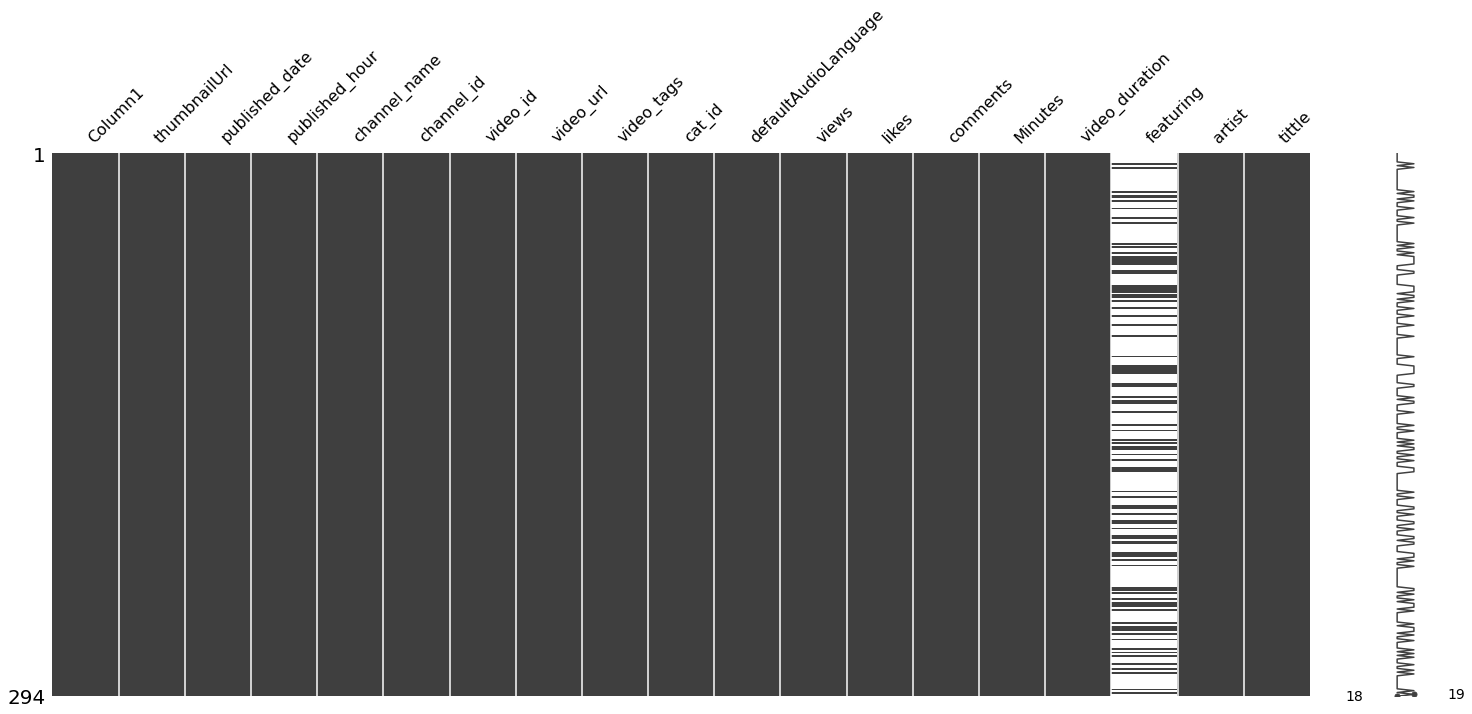

In [39]:
msno.matrix(youtube)

In [40]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Column1               294 non-null    int64  
 1   thumbnailUrl          294 non-null    object 
 2   published_date        294 non-null    object 
 3   published_hour        294 non-null    object 
 4   channel_name          294 non-null    object 
 5   channel_id            294 non-null    object 
 6   video_id              294 non-null    object 
 7   video_url             294 non-null    object 
 8   video_tags            294 non-null    object 
 9   cat_id                294 non-null    int64  
 10  defaultAudioLanguage  294 non-null    object 
 11  views                 294 non-null    int64  
 12  likes                 294 non-null    int64  
 13  comments              294 non-null    int64  
 14  Minutes               294 non-null    float64
 15  video_duration        2

In [41]:
# Top 10 videos have the most views
top_videos = youtube[['tittle','artist','views']].nlargest(n=10, columns = 'views')
top_videos

,tittle,artist,views
208,Despacito,Luis Fonsi,7905249684
212,Shape of You,Ed Sheeran,5762568227
167,See You Again,Wiz Khalifa,5569210905
166,Uptown Funk,Mark Ronson,4626830580
158,GANGNAM STYLE(?????) M/V,PSY,4479519944
174,Sugar,Maroon 5,3724875772
162,Roar,Katy Perry,3614951058
168,Counting Stars,OneRepublic,3606027843
178,Sorry (PURPOSE : The Movement),Justin Bieber,3563187029
177,Thinking Out Loud,Ed Sheeran,3470399438


<AxesSubplot:>

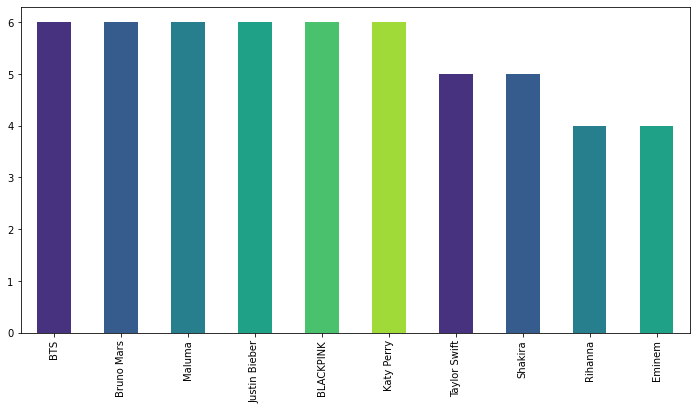

In [42]:
# Top 10 artists have most videos with more than 1B views
top_artists = youtube['artist'].value_counts().nlargest(10).plot(kind='bar', figsize=(12,6), color=sns.color_palette("viridis"))
top_artists

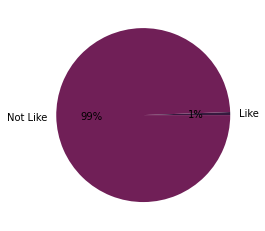

In [43]:
# Percentage of likes
total_likes = youtube['likes'].sum()
total_not_likes = youtube['views'].sum() - youtube['likes'].sum()
data1 = [total_likes, total_not_likes]
labels = ['Like', 'Not Like']
color = sns.color_palette('rocket')
plt.pie(data1, labels = labels, colors = color, autopct = '%.0f%%')
plt.show()

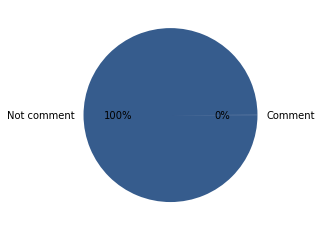

In [44]:
# Percentage of comments
total_comments = youtube['comments'].sum()
total_not_comments = youtube['views'].sum() - youtube['comments'].sum()
data = [total_comments, total_not_comments]
labels = ['Comment', 'Not comment']
color = sns.color_palette('viridis')
plt.pie(data, labels = labels, colors = color, autopct = '%.0f%%')
plt.show()

In [66]:
print(total_likes)
print(total_comments)
print(total_comments/total_likes)

2740986343
168877547
0.06161196221618679


In [45]:
# Average time duration
avg_duration_by_mins = round(youtube['video_duration'].mean()/60,2)
avg_duration_by_mins

4.16

In [46]:
# Publish Time
import datetime
youtube['published_date'] = pd.to_datetime(youtube['published_date'])
youtube['year'] = youtube['published_date'].dt.year
youtube['year'].head()

0    2020
1    2020
2    2009
3    2013
4    2009
Name: year, dtype: int64

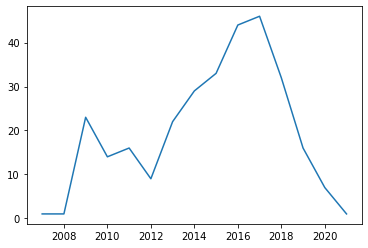

In [47]:
vid_by_year = pd.DataFrame(youtube.groupby('year').size())
plt.plot(vid_by_year)
plt.show()

In [16]:
category = pd.read_csv("C:\\Users\\nguye\\OneDrive - iPrice Group\\Documents\\Project Dataset\\categories.csv", encoding='ISO-8859-1')

In [17]:
category.head()

,id,category_name
0,2,Autos & Vehicles
1,1,Film & Animation
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [19]:
youtube_cat = youtube.merge(category, left_on='cat_id', right_on='id',how = 'left')
youtube_cat.head()

,Column1,thumbnailUrl,published_date,published_hour,channel_name,channel_id,video_id,video_url,video_tags,cat_id,...,views,likes,comments,Minutes,video_duration,featuring,artist,tittle,id,category_name
0,0,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,2020-08-21,3:58,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,gdZLi9oWNZg,https://www.youtube.com/watch?v=gdZLi9oWNZg,"BIGHIT,???,?????,BTS,BANGTAN,??",10,...,1521861575,34506115,16039232,3.73,224,NaN,BTS,Dynamite,10,Music
1,1,https://i.ytimg.com/vi/CZt-rVn2BJs/default.jpg,2020-10-02,5:30,Desi Records,UC36Ah1MtcBPjwP1RXEDXOZA,CZt-rVn2BJs,https://www.youtube.com/watch?v=CZt-rVn2BJs,"52 gaj ka daman,52 Gaj Pranjal Dahiya,Pranjal ...",10,...,1423488438,6991068,145845,3.18,191,NaN,"PRANJAL DAHIYA,AMAN JAJI,RENUKA PANWAR,MUKESH ...",52 GAJ KA DAMAN,10,Music
2,2,https://i.ytimg.com/vi/VuNIsY6JdUw/default.jpg,2009-06-16,22:02,TaylorSwiftVEVO,UCANLZYMidaCbLQFWXBC95Jg,VuNIsY6JdUw,https://www.youtube.com/watch?v=VuNIsY6JdUw,"Taylor,Swift,Big,Machine,Records,LLC,Country",10,...,1331652258,8576951,417058,3.82,229,NaN,Taylor Swift,You Belong With Me,10,Music
3,3,https://i.ytimg.com/vi/msSc7Mv0QHY/default.jpg,2013-11-06,16:52,J. Geco,UCpIMOJmLiDq8ikUzrjezMIA,msSc7Mv0QHY,https://www.youtube.com/watch?v=msSc7Mv0QHY,"Chicken,song,dance,remix,dubstep,techno,house,...",10,...,1304781302,6937450,209575,2.52,151,NaN,J.Geco,Chicken Song,10,Music
4,4,https://i.ytimg.com/vi/dQw4w9WgXcQ/default.jpg,2009-10-25,6:57,Rick Astley,UCuAXFkgsw1L7xaCfnd5JJOw,dQw4w9WgXcQ,https://www.youtube.com/watch?v=dQw4w9WgXcQ,"rick astley,Never Gonna Give You Up,nggyu,neve...",10,...,1249126991,14796530,2187460,3.55,213,NaN,Rick Astley,Never Gonna Give You Up,10,Music


<AxesSubplot:>

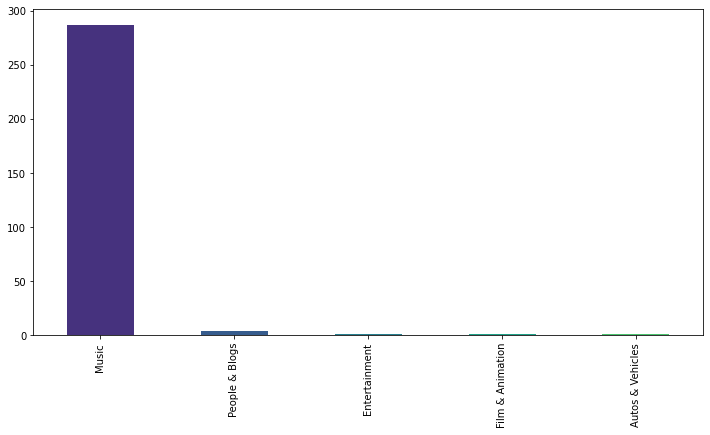

In [48]:
top_categories = youtube_cat['category_name'].value_counts().nlargest(10).plot(kind='bar', figsize=(12,6), color=sns.color_palette("viridis"))
top_categories

In [55]:
not_music = youtube_cat[youtube_cat['category_name'] != "Music"]
not_music.loc[:, ["tittle","category_name","views"]]

,tittle,category_name,views
10,????? (AS IF IT'S YOUR LAST)' M/V,People & Blogs,1186495421
40,The Fox (What Does The Fox Say?),Entertainment,1071527995
48,Bodak Yellow,People & Blogs,1055675097
131,??? (BOOMBAYAH)' M/V,People & Blogs,1441994701
202,along | Official Disney UK,Film & Animation,2896308798
221,Shaky Shaky,Autos & Vehicles,1627824082
241,Where Are Ü Now,People & Blogs,1217447014


In [56]:
# These videos above were wrongly tagged under incorrect categories, except "FROZEN | Let It Go Sing-along | Official Disney UK" is Film & Animation makes most sense.

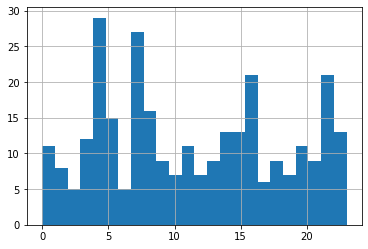

In [64]:
youtube['hour'] = pd.to_datetime(youtube['published_hour'], format='%H:%M').dt.hour
youtube['hour'].hist(bins=24)
plt.show()